# **Project 2**, APS1070 Winter 2023
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Mar 4, 11 PM - 13 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: A good man
*   Student Number: 

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



##**Part 1: Getting started [2 Marks]**

We are going to work with a forest cover dataset: http://odds.cs.stonybrook.edu/forestcovercovertype-dataset/. This dataset contains 10 quantitative features that contain cartographic information.

Load the dataset in CSV file using Pandas. The dataset is called `vehicle_insurance.csv`. Print out the first few columns of the dataset.

* How many rows are there? 286048 **[0.1]**
* Which column contains the targets? Anomaly**[0.1]**
* What is the meaning of target values? Target value is 1 if that sample is an outlier, target value is 0 if that sample is valid. **[0.2]**

In [1]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import wget

wget.download('https://github.com/APS1070-W23/datasets/raw/main/forest_data_all.tar.gz','forest_data_all.tar.gz')

'forest_data_all.tar (1).gz'

In [3]:
!tar -zxvf forest_data_all.tar.gz

forest_data_all.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('forest_data_all.csv')

# rows in dataset: 286048
[0 1]


<AxesSubplot:ylabel='Frequency'>

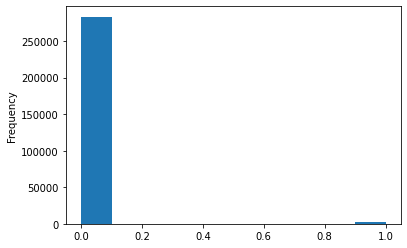

In [5]:
### YOUR CODE HERE ###
print(f"# rows in dataset: {len(df)}")
print(df.Anomaly.unique())
df.Anomaly.plot(kind = 'hist')

It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? 

Ans: Percentage of entries with label 1: 0.96%, percentage of entries with label 0: 99.04% **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case? 

Ans: The data is unbalanced since there are much more entries with label 0 than entries with label 1. This is because normally there will be much more valid data than anomalous data.**[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? 

Ans: Data balance is important because the model usually generates its prediction biased towards the majority class,therefore, we often want to use a balanced dataset when training our algorithm. For a KNN classifier, it will not be affected by data inbalance massively since the algorithm is not affected by the size of the class and it will not favor any class on the basis of size. When we run KNN, the outliers turn to have their own class. **[0.5]**
* What metrics should we use to evaluate a model in such cases**[0.2]**

Ans:
F1 score or ROC curve.

In [6]:
### YOUR CODE HERE ###
df_label1 = df[df['Anomaly']==1]
df_label0 = df[df['Anomaly']==0]
assert len(df_label0) + len(df_label1) == len(df), "length mismatch detected"
print(f"percentage of entries with label 1: {len(df_label1)/(len(df_label1)+ len(df_label0))* 100}%")
print(f"percentage of entries with label 0: {len(df_label0)/(len(df_label1)+ len(df_label0))* 100}%")

percentage of entries with label 1: 0.9603283365029646%
percentage of entries with label 0: 99.03967166349703%


Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [7]:
### Split the data  ###
Y = df['Anomaly']
#print(Y)
X = df.drop(['Anomaly'], axis =1)
#print(X)
#print(df)
# split dataset
x_train, x_left, y_train, y_left = train_test_split(X, Y, test_size=0.35, random_state = 40) # get 65% training 
x_val, x_test, y_val, y_test = train_test_split(x_left, y_left, test_size=0.43, random_state = 40) # get 20% validation and 15% testing
print(f"original dataset size: {df.shape}")
print(f"training set sizes: {x_train.shape, y_train.shape}")
print(f"validation set sizes: {x_val.shape, y_val.shape}")
print(f"testing set sizes: {x_test.shape, y_test.shape}")
print(f"% train: {y_train.shape[0]/df.shape[0]*100}%, % validation: {y_val.shape[0]/df.shape[0]*100}%, % test: {y_test.shape[0]/df.shape[0]*100}%")


original dataset size: (286048, 11)
training set sizes: ((185931, 10), (185931,))
validation set sizes: ((57066, 10), (57066,))
testing set sizes: ((43051, 10), (43051,))
% train: 64.99993008166462%, % validation: 19.949798635194092%, % test: 15.050271283141292%


Now, let's take a look at the difference in distribution for some variables between anomalous and non-anomalous forests:

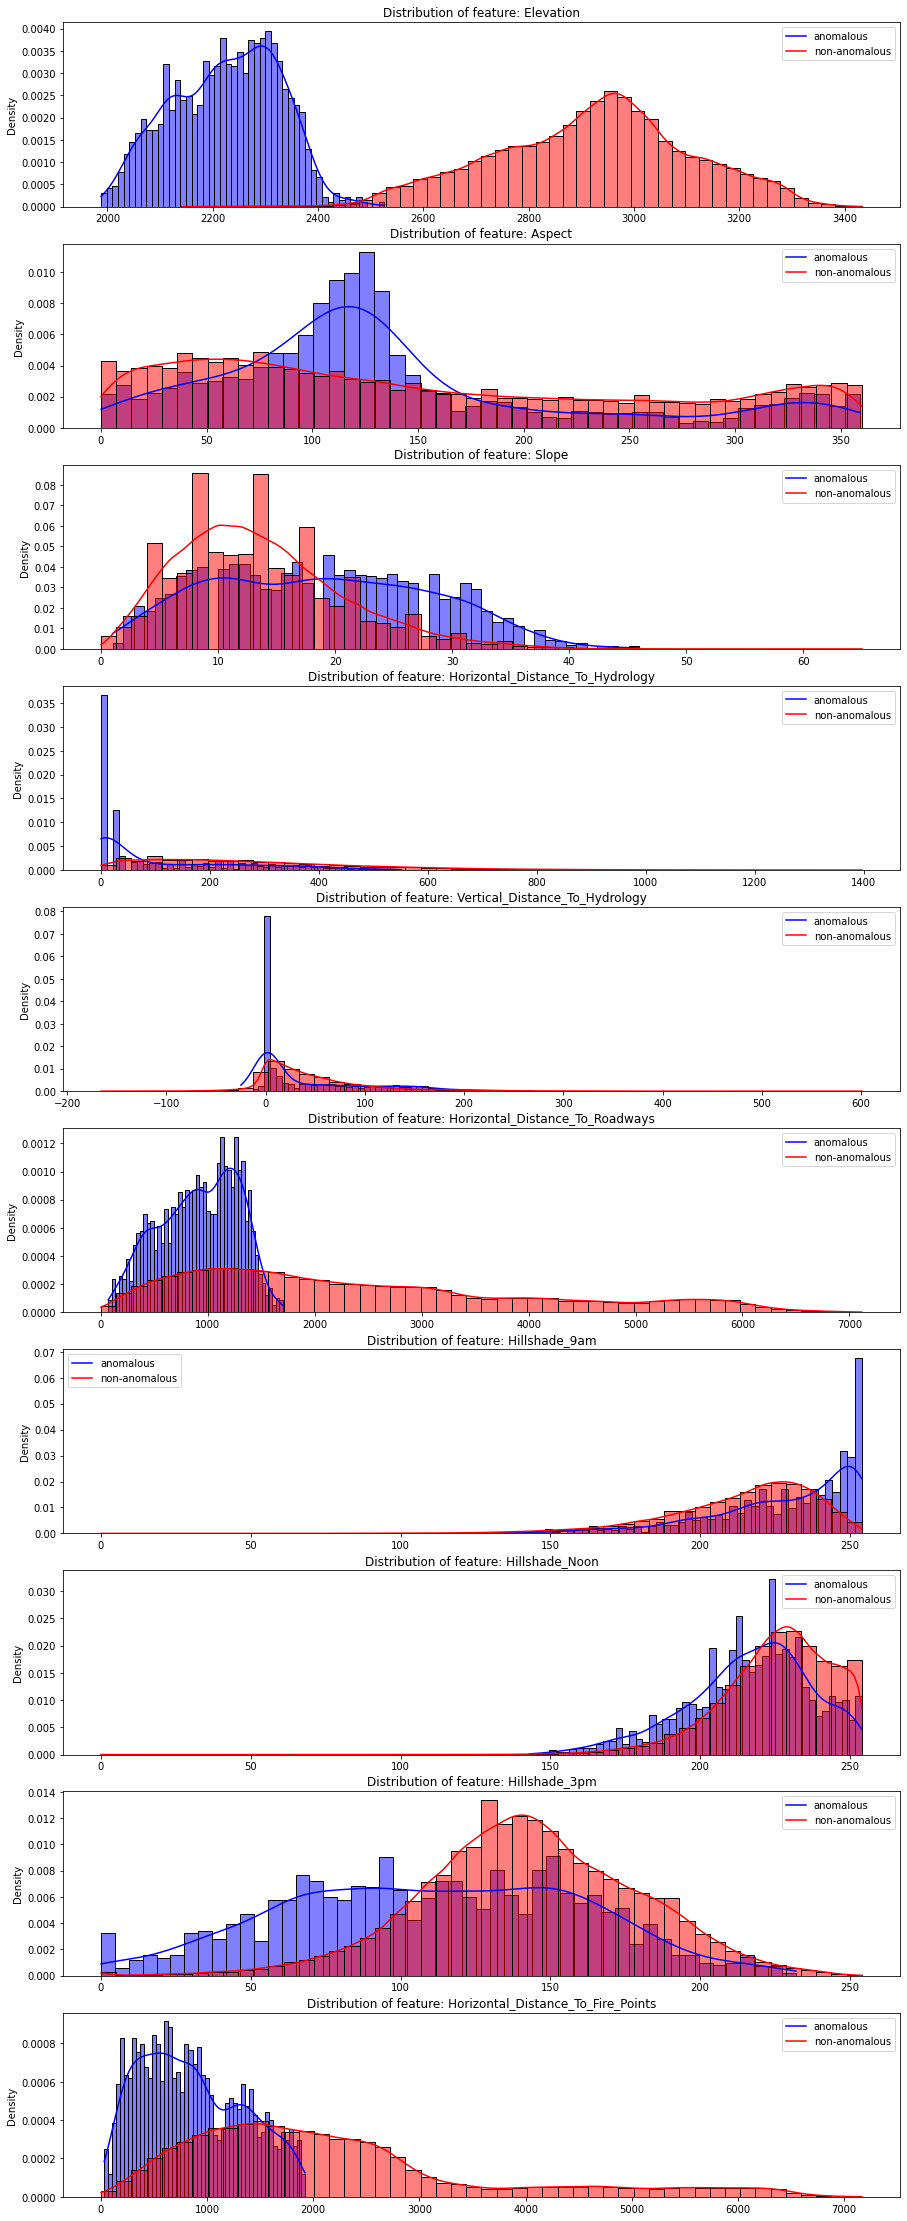

In [8]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if not 'id' in f and not 'Anomaly' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(x_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(x_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['anomalous', 'non-anomalous'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

Ans: By observing the graphs, we notice that for some features, the distribution of two classes are heavily overlapped therefore it would be hard to correctly classify them using those features (such as Hillshade_Noon). Also, there are features in which the distributions of two classes are spread for away, this means that we can apply gaussian models on these features to do anomaly detection (such as Elevation).

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**

  Ans: see cell#9 and #10.
  4. Find the best 3 features to distinguish anomalous forests from non-anomalous forests based on the AUC of the validation set. **[0.2]**

  Ans: 3 features: Elevation, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Fire_Points
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that forest as an anomaly. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**

  Ans: see cell #12 and #13.
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

  Ans: O(n^2) since there is a double nested loop. We can make it O(n) by setting a step size = len(y_val) / #sample tr, such as step_size = int(len(y_val)/100)

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-anomalous forests in the training set** in step 1 (instead of all the forests).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**

 Ans: see cell #19 and #20.
 4. Are these results different or similar? Why?**[0.3]**

 Ans: The results are very similar because there are for more non-anomalous data than anomalous data, therefore, removing the anomalous data does not have an obvious impact on either the F1 score or AUCs for each feature. However, we observe slight improvement in both F1 score and AUC after we remove the anomalous data, this is because although the percentage of anomalous data is small, it does have some impact when we try to fit the two classes using a single component Gaussian Model.Consider the distribution plot of Elevation, there would be a very small bump at the left side due to the distribution of anomalous data, after we remove it, the model's performance improves a little bit.
 5. How would class imbalance affect any classifier in general (apart from just a KNN)? **[0.2]**

Ans: In general, if the class is unbalanced, the classifier will tend to be biased towards the majority class, generating more predictions of the majority class. This will lead to bad classification accuracy for the minority class.

In [9]:
### YOUR CODE HERE ###
# a. Fitting regardless of class:
import sklearn
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.mixture import GaussianMixture

features = list(x_train.columns)
auc_list_train = []
auc_list_val = []
gau_model = GaussianMixture(n_components=1, covariance_type = 'full', random_state=0)

#calculate AUC for each feature on training set
for feature in features:
  feature_to_fit = x_train[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_to_fit) # fit on full training set
  feature_to_compute = feature_to_fit # compute AUC for training set
  p = gau_model.score_samples(feature_to_compute) #compute auc based on both train and val
  y_compute = y_train 
  fpr_sc, tpr_sc, _= roc_curve(y_compute, -1*p)
  auc_list_train.append(auc(fpr_sc, tpr_sc))

#calculate AUC for each feature on valid set
for feature in features:
  feature_to_fit = x_train[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_to_fit) # fit on full training set
  feature_to_compute = x_val[feature].to_numpy().reshape(-1,1) # compute AUC for valid set
  p = gau_model.score_samples(feature_to_compute) #compute auc based on both train and val
  y_compute = y_val 
  fpr_sc, tpr_sc, _= roc_curve(y_compute, -1*p)
  auc_list_val.append(auc(fpr_sc, tpr_sc))


print("The AUC table based on training set: ")
table_train_2a = pd.DataFrame({'Feature' : features, 'AUC' : auc_list_train})    
table_train_2a




The AUC table based on training set: 


,Feature,AUC
0,Elevation,0.999354
1,Aspect,0.375082
2,Slope,0.649013
3,Horizontal_Distance_To_Hydrology,0.654778
4,Vertical_Distance_To_Hydrology,0.649988
5,Horizontal_Distance_To_Roadways,0.613043
6,Hillshade_9am,0.636541
7,Hillshade_Noon,0.540122
8,Hillshade_3pm,0.664397
9,Horizontal_Distance_To_Fire_Points,0.672014


In [10]:
print("The AUC table based on validation set: ")
table_val_2a = pd.DataFrame({'Feature' : features, 'AUC' : auc_list_val})    
table_val_2a

The AUC table based on validation set: 


,Feature,AUC
0,Elevation,0.999405
1,Aspect,0.376416
2,Slope,0.642920
3,Horizontal_Distance_To_Hydrology,0.646229
4,Vertical_Distance_To_Hydrology,0.649174
5,Horizontal_Distance_To_Roadways,0.609624
6,Hillshade_9am,0.623170
7,Hillshade_Noon,0.529063
8,Hillshade_3pm,0.646837
9,Horizontal_Distance_To_Fire_Points,0.676325


In [11]:
#Find the best 3 features to distinguish anomalous forests from non-anomalous forests based on the AUC of the validation set.
table_val_2a['rank'] = table_val_2a['AUC'].rank(ascending = False)
features_selected = table_val_2a.loc[table_val_2a['rank'].isin([1,2,3])]
feature_selected = features_selected.sort_values("rank")
feature_selected

,Feature,AUC,rank
0,Elevation,0.999405,1.0
9,Horizontal_Distance_To_Fire_Points,0.676325,2.0
4,Vertical_Distance_To_Hydrology,0.649174,3.0


In [12]:
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#Make a prediction based on a model's scores:
features = list(features_selected['Feature'])
f1s = []
thresholds = []
precisions = []
recalls = []
def find_threshold(feature): #find the best threshold value and the maximum F1 score given a feature
    feature_train = x_train[feature].to_numpy().reshape(-1,1)
    gau_model.fit(feature_train)
    feature_val = x_val[feature].to_numpy().reshape(-1,1)
    p_gm = gau_model.score_samples(feature_val) # get the scores on validation set
    
    step_size = 100
    f1_list = []
    tr_list = []
    for i in range (0, len(y_val), step_size):
      y_prediction = []
      tr = sorted(p_gm)[i] #We sort the points by probability, fix a threshold here
      for j in range (len(y_val)):
        if p_gm[j] < tr: #predict anomaly
          y_prediction.append(1)
        else:  #predict normal
          y_prediction.append(0)
      f1 = f1_score(y_val, y_prediction)
      f1_list.append(f1)
      tr_list.append(tr)
    #now choose the best f1 score and the corresponding best threshold
    f1_index = np.argmax(f1_list)
    f1_best = f1_list[f1_index]
    threshold = tr_list[f1_index]
    return f1_best, threshold        

      
for feature in features:
  f1, tr = find_threshold(feature)
  print(f"Feature: {feature}, best F1: {f1}, optimal threshold: {tr}")
  thresholds.append(tr)

#Report Precision, Recall and F1 score on both training and validation set in a table using the threshold
i = 0
for feature in features:
  feature_train = x_train[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_train)
  p_gm = gau_model.score_samples(feature_train)
  precision = precision_score(y_train, p_gm < thresholds[i])
  recall = recall_score(y_train, p_gm < thresholds[i])
  f1 = f1_score(y_train, p_gm < thresholds[i])
  i = i+1
  precisions.append(precision)
  recalls.append(recall)
  f1s.append(f1)
#Report on training set
print("Training set: ")
table = pd.DataFrame({'Feature' : features, 'optimal threshold' : thresholds, 'precision': precisions, 'recall': recalls, 'f1': f1s})    
table



Feature: Elevation, best F1: 0.8754385964912281, optimal threshold: -10.11731938407701
Feature: Vertical_Distance_To_Hydrology, best F1: 0.03858985765124555, optimal threshold: -5.278446042619833
Feature: Horizontal_Distance_To_Fire_Points, best F1: 0.035424598576394635, optimal threshold: -8.569147336631486
Training set: 


,Feature,optimal threshold,precision,recall,f1
0,Elevation,-10.117319,0.841891,0.924623,0.881320
1,Vertical_Distance_To_Hydrology,-5.278446,0.020242,0.648241,0.039259
2,Horizontal_Distance_To_Fire_Points,-8.569147,0.018033,0.575656,0.034971


In [13]:
i = 0
precisions_val = []
recalls_val = []
f1s_val = []
for feature in features:
  feature_train = x_train[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_train)
  feature_val = x_val[feature].to_numpy().reshape(-1,1)
  p_gm = gau_model.score_samples(feature_val)
  precision = precision_score(y_val, p_gm < thresholds[i])
  recall = recall_score(y_val, p_gm < thresholds[i])
  f1 = f1_score(y_val, p_gm < thresholds[i])
  i = i+1
  precisions_val.append(precision)
  recalls_val.append(recall)
  f1s_val.append(f1)
# Report on valid set
print("Validation set: ")
table = pd.DataFrame({'Feature' : features, 'optimal threshold' : thresholds, 'precision': precisions_val, 'recall': recalls_val, 'f1': f1s_val})    
table

Validation set: 


,Feature,optimal threshold,precision,recall,f1
0,Elevation,-10.117319,0.834448,0.920664,0.875439
1,Vertical_Distance_To_Hydrology,-5.278446,0.019895,0.640221,0.038590
2,Horizontal_Distance_To_Fire_Points,-8.569147,0.018258,0.592251,0.035425


In [14]:
#b.Fitting based on class, only fit Gaussian on non-anomalous data
#compute AUC, F1 score, Precision and Recall 
  # first create non-anomalous training set
x_train_normal = x_train.copy() 
y_train_normal = y_train.copy()
x_train_normal['label'] = y_train_normal
x_train_normal = x_train_normal.loc[x_train_normal['label'] == 0]
x_train_normal = x_train_normal.drop(['label'],axis = 1)
y_train_normal = y_train_normal.loc[y_train_normal == 0]
assert len(x_train_normal) == len(y_train_normal), "non-anamalous training dataset length mismatch!"

features = list(x_train_normal.columns)
auc_list_train = []
auc_list_val = []
gau_model = GaussianMixture(n_components=1, covariance_type = 'full', random_state=0)

#calculate AUC for each feature on training set
for feature in features:
  feature_to_fit = x_train_normal[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_to_fit) # fit on full training set
  feature_to_compute = x_train[feature].to_numpy().reshape(-1,1) # compute AUC for training set
  p = gau_model.score_samples(feature_to_compute) #compute auc based on both train and val
  y_compute = y_train 
  fpr_sc, tpr_sc, _= roc_curve(y_compute, -1*p)
  auc_list_train.append(auc(fpr_sc, tpr_sc))

#calculate AUC for each feature on valid set
for feature in features:
  feature_to_fit = x_train_normal[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_to_fit) # fit on full training set
  feature_to_compute = x_val[feature].to_numpy().reshape(-1,1) # compute AUC for valid set
  p = gau_model.score_samples(feature_to_compute) #compute auc based on both train and val
  y_compute = y_val 
  fpr_sc, tpr_sc, _= roc_curve(y_compute, -1*p)
  auc_list_val.append(auc(fpr_sc, tpr_sc))


print("The AUC table based on training set: ")
table_train = pd.DataFrame({'Feature' : features, 'AUC' : auc_list_train})    
table_train


The AUC table based on training set: 


,Feature,AUC
0,Elevation,0.999364
1,Aspect,0.375082
2,Slope,0.649013
3,Horizontal_Distance_To_Hydrology,0.655411
4,Vertical_Distance_To_Hydrology,0.649988
5,Horizontal_Distance_To_Roadways,0.615885
6,Hillshade_9am,0.638706
7,Hillshade_Noon,0.540122
8,Hillshade_3pm,0.664397
9,Horizontal_Distance_To_Fire_Points,0.674362


In [15]:
print("The AUC table based on validation set: ")
table_val = pd.DataFrame({'Feature' : features, 'AUC' : auc_list_val})    
table_val

The AUC table based on validation set: 


,Feature,AUC
0,Elevation,0.999418
1,Aspect,0.376416
2,Slope,0.642920
3,Horizontal_Distance_To_Hydrology,0.646609
4,Vertical_Distance_To_Hydrology,0.649174
5,Horizontal_Distance_To_Roadways,0.612512
6,Hillshade_9am,0.625629
7,Hillshade_Noon,0.529063
8,Hillshade_3pm,0.646837
9,Horizontal_Distance_To_Fire_Points,0.678554


In [16]:
#Find the best 3 features to distinguish anomalous forests from non-anomalous forests based on the AUC of the validation set.
table_val['rank'] = table_val['AUC'].rank(ascending = False)
features_selected_val_2b = table_val.loc[table_val['rank'].isin([1,2,3])]
features_selected_val_2b = features_selected_val_2b.sort_values("rank")
#Find the best 3 features to distinguish anomalous forests from non-anomalous forests based on the AUC of the training set.
table_train['rank'] = table_train['AUC'].rank(ascending = False)
features_selected_train_2b = table_train.loc[table_train['rank'].isin([1,2,3])]
features_selected_train_2b = features_selected_train_2b.sort_values("rank")

features_selected_train_2b

,Feature,AUC,rank
0,Elevation,0.999364,1.0
9,Horizontal_Distance_To_Fire_Points,0.674362,2.0
8,Hillshade_3pm,0.664397,3.0


In [17]:
#Make a prediction based on a model's scores:
features = list(features_selected['Feature'])
f1s_2b = []
thresholds_2b = []
precisions_2b = []
recalls_2b = []
def find_threshold(feature): #find the best threshold value and the maximum F1 score given a feature
    feature_train = x_train_normal[feature].to_numpy().reshape(-1,1)
    gau_model.fit(feature_train)
    feature_val = x_val[feature].to_numpy().reshape(-1,1)
    p_gm = gau_model.score_samples(feature_val) # get the scores on validation set
    
    step_size = 100
    f1_list = []
    tr_list = []
    for i in range (0, len(y_val), step_size):
      y_prediction = []
      tr = sorted(p_gm)[i] #We sort the points by probability, fix a threshold here
      for j in range (len(y_val)):
        if p_gm[j] < tr: #predict anomaly
          y_prediction.append(1)
        else:  #predict normal
          y_prediction.append(0)
      f1 = f1_score(y_val, y_prediction)
      f1_list.append(f1)
      tr_list.append(tr)
    #now choose the best f1 score and the corresponding best threshold
    f1_index = np.argmax(f1_list)
    f1_best = f1_list[f1_index]
    threshold = tr_list[f1_index]
    return f1_best, threshold        

      
for feature in features:
  f1, tr = find_threshold(feature)
  print(f"Feature: {feature}, best F1: {f1}, optimal threshold: {tr}")
  thresholds_2b.append(tr)

#Report Precision, Recall and F1 score on both training and validation set in a table using the threshold
i = 0
for feature in features:
  feature_train = x_train_normal[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_train)
  feature_compute = x_train[feature].to_numpy().reshape(-1,1)
  p_gm = gau_model.score_samples(feature_compute)
  precision = precision_score(y_train, p_gm < thresholds[i])
  recall = recall_score(y_train, p_gm < thresholds[i])
  f1 = f1_score(y_train, p_gm < thresholds[i])
  i = i+1
  precisions_2b.append(precision)
  recalls_2b.append(recall)
  f1s_2b.append(f1)
#Report on training set
print("Training set: ")
table = pd.DataFrame({'Feature' : features, 'optimal threshold' : thresholds_2b, 'precision': precisions_2b, 'recall': recalls_2b, 'f1': f1s_2b})    
table

Feature: Elevation, best F1: 0.8754385964912281, optimal threshold: -10.658828053625264
Feature: Vertical_Distance_To_Hydrology, best F1: 0.03858985765124555, optimal threshold: -5.277755070385899
Feature: Horizontal_Distance_To_Fire_Points, best F1: 0.035652992304711285, optimal threshold: -8.576452034494409
Training set: 


,Feature,optimal threshold,precision,recall,f1
0,Elevation,-10.658828,0.810185,0.977108,0.885852
1,Vertical_Distance_To_Hydrology,-5.277755,0.020242,0.648241,0.039259
2,Horizontal_Distance_To_Fire_Points,-8.576452,0.018106,0.584590,0.035124


In [18]:
i = 0
precisions_val_2b = []
recalls_val_2b = []
f1s_val_2b = []
for feature in features:
  feature_train = x_train_normal[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_train)
  feature_val = x_val[feature].to_numpy().reshape(-1,1)
  p_gm = gau_model.score_samples(feature_val)
  precision = precision_score(y_val, p_gm < thresholds[i])
  recall = recall_score(y_val, p_gm < thresholds[i])
  f1 = f1_score(y_val, p_gm < thresholds[i])
  i = i+1
  precisions_val_2b.append(precision)
  recalls_val_2b.append(recall)
  f1s_val_2b.append(f1)
# Report on valid set
print("Validation set: ")
table = pd.DataFrame({'Feature' : features, 'optimal threshold' : thresholds_2b, 'precision': precisions_val_2b, 'recall': recalls_val_2b, 'f1': f1s_val_2b})    
table

Validation set: 


,Feature,optimal threshold,precision,recall,f1
0,Elevation,-10.658828,0.798790,0.974170,0.877805
1,Vertical_Distance_To_Hydrology,-5.277755,0.019895,0.640221,0.038590
2,Horizontal_Distance_To_Fire_Points,-8.576452,0.018176,0.597786,0.035279


In [19]:
#Compare results from parts 2a and 2b in a table (for both training and validation set).
  # for training set
fitted = ['both anomalous/non anomalous', 'both anomalous/non anomalous', 'both anomalous/non anomalous', 'only non-anomalous','only non-anomalous', 'only non-anomalous']
features_plot = 2*features
threshold_plot = thresholds + thresholds_2b
precision_plot = precisions + precisions_2b
recall_plot = recalls + recalls_2b
f1_plot = f1s + f1s_2b
  # get AUC values
auc_2a_train =[]
auc_2b_train = []
for feature in features:
  for index,row in table_train_2a.iterrows():
    if feature == row['Feature']:
      auc_2a_train.append(row['AUC'])
    else:
      pass
for feature in features:
  for index,row in table_train.iterrows():
    if feature == row['Feature']:
      auc_2b_train.append(row['AUC'])
    else:
      pass

  
auc_plot = auc_2a_train + auc_2b_train

table = pd.DataFrame({'Gaussian fitted on': fitted, 
                      'Feature': features_plot, 
                      'optimal threshold': threshold_plot,
                      'precision':precision_plot,
                      'recall':recall_plot,
                      'f1':f1_plot,
                      'AUC': auc_plot})

print("Training set: ")
table

Training set: 


,Gaussian fitted on,Feature,optimal threshold,precision,recall,f1,AUC
0,both anomalous/non anomalous,Elevation,-10.117319,0.841891,0.924623,0.881320,0.999354
1,both anomalous/non anomalous,Vertical_Distance_To_Hydrology,-5.278446,0.020242,0.648241,0.039259,0.649988
2,both anomalous/non anomalous,Horizontal_Distance_To_Fire_Points,-8.569147,0.018033,0.575656,0.034971,0.672014
3,only non-anomalous,Elevation,-10.658828,0.810185,0.977108,0.885852,0.999364
4,only non-anomalous,Vertical_Distance_To_Hydrology,-5.277755,0.020242,0.648241,0.039259,0.649988
5,only non-anomalous,Horizontal_Distance_To_Fire_Points,-8.576452,0.018106,0.584590,0.035124,0.674362


In [20]:
# For validation set
precision_plot_val = precisions_val + precisions_val_2b
recall_plot_val = recalls_val + recalls_val_2b
f1_plot_val = f1s_val + f1s_val_2b

auc_2a_val =[]
auc_2b_val = []
for feature in features:
  for index,row in table_val_2a.iterrows():
    if feature == row['Feature']:
      auc_2a_val.append(row['AUC'])
    else:
      pass
for feature in features:
  for index,row in table_val.iterrows():
    if feature == row['Feature']:
      auc_2b_val.append(row['AUC'])
    else:
      pass

  
auc_plot_val = auc_2a_val + auc_2b_val
table = pd.DataFrame({'Gaussian fitted on': fitted, 
                      'Feature': features_plot, 
                      'optimal threshold': threshold_plot,
                      'precision':precision_plot_val,
                      'recall':recall_plot_val,
                      'f1':f1_plot_val,
                      'AUC':auc_plot_val})

print("Validation set: ")
table

Validation set: 


,Gaussian fitted on,Feature,optimal threshold,precision,recall,f1,AUC
0,both anomalous/non anomalous,Elevation,-10.117319,0.834448,0.920664,0.875439,0.999405
1,both anomalous/non anomalous,Vertical_Distance_To_Hydrology,-5.278446,0.019895,0.640221,0.038590,0.649174
2,both anomalous/non anomalous,Horizontal_Distance_To_Fire_Points,-8.569147,0.018258,0.592251,0.035425,0.676325
3,only non-anomalous,Elevation,-10.658828,0.798790,0.974170,0.877805,0.999418
4,only non-anomalous,Vertical_Distance_To_Hydrology,-5.277755,0.019895,0.640221,0.038590,0.649174
5,only non-anomalous,Horizontal_Distance_To_Fire_Points,-8.576452,0.018176,0.597786,0.035279,0.678554


## **Part 3: One Gaussian model with multiple features: [2 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**

 Ans: see cell # 21.
 3. On the scatter plot color the training set based on their class (non-anomalous blue and anomalous red). **[0.25]**

 Ans: see cell #21.
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on non-anomalous forests). **[0.25]**

 Ans: For the graph in cell #21,if we observe the non-anomalous forests (blue), we see that there is only one round cluster, so 1 Gaussian components will be needed.
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets **[0.25]**

 Ans: see cell #22.
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**

 Ans: see cell #24.
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**

 Ans: see cell #25.
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

Ans: see cell #26 and #27.


Text(0.5, 0, 'Feature1: Elevation')

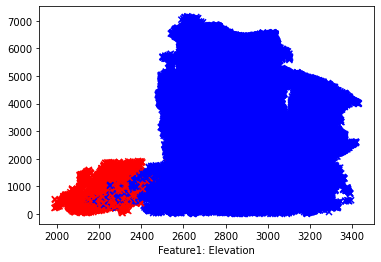

In [21]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt

features = list(table_val.loc[table_val['rank'].isin([1,2,3,4])].sort_values("rank")['Feature'])

features_1 = features[0:2] # pick 2 features
feature1 = x_train[features_1[0]]
feature2 = x_train[features_1[1]]
color = {0: 'blue',1:'red'} #non-anomalous blue and anomalous red
plot_color = y_train.map(color)
plt.scatter(feature1, feature2, marker='x', c = plot_color)
plt.xlabel(f'Feature1: {features[0]}')

In [22]:
def part3_2_to_3(features): # features: a list with length 2
  feature1 = x_train[features[0]]
  feature2 = x_train[features[1]]
  color = {0: 'blue',1:'red'} #non-anomalous blue and anomalous red
  # make scatter plot
  plot_color = y_train.map(color)
  plt.scatter(feature1, feature2, marker='x', c = plot_color)
  plt.xlabel(f'Feature1: {features[0]}')
  plt.ylabel(f'Feature2: {features[1]}')
  plt.show()

def part3_5_to_6(features, n):
  #Fit Gaussian model on training set with 2 features
  model = GaussianMixture(n_components = n, covariance_type = 'full', random_state=0)
  feature_train = x_train[[features[0],features[1]]].to_numpy()
  model.fit(feature_train)
  #Compute AUC on training set
  feature_compute = feature_train
  gm_ss = model.score_samples(feature_compute) 
  y_compute = y_train 
  fpr, tpr, _= roc_curve(y_compute, -1*gm_ss)
  auc_train = auc(fpr, tpr)
  #Compute AUC on validation set   
  feature_compute = x_val[[features[0],features[1]]].to_numpy()
  gm_ss = model.score_samples(feature_compute) 
  y_compute = y_val 
  fpr, tpr, _= roc_curve(y_compute, -1*gm_ss)
  auc_val = auc(fpr, tpr)

  return auc_train, auc_val
  

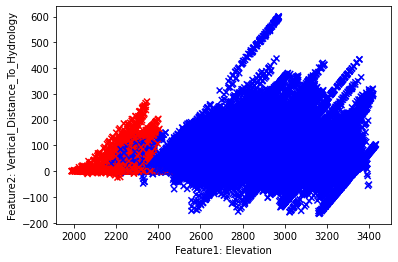

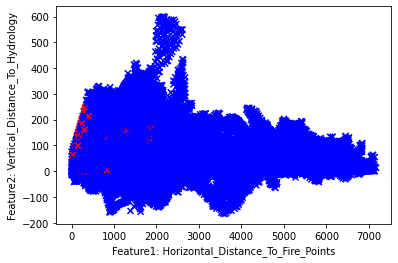

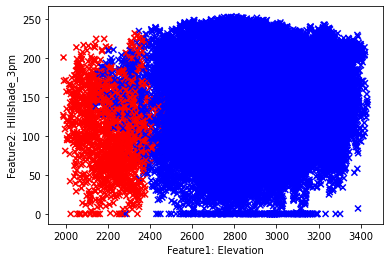

In [23]:
#show AUC on both training and validation set for features_1 (the first chosen feature pair)
#features_1 = [features[0],features[1]]
feature_pairs = []
aucs_train = []
aucs_val = []
auc_train_1, auc_val_1 = part3_5_to_6(features_1,1)
feature_pairs.append(tuple(features_1))
aucs_train.append(auc_train_1)
aucs_val.append(auc_val_1)

#2nd chosen feature pair
features_2 = [features[0],features[2]]
part3_2_to_3(features_2) # plot the scatter plot, we choose n=1
auc_train_2, auc_val_2 = part3_5_to_6(features_2, 1)
feature_pairs.append(tuple(features_2))
aucs_train.append(auc_train_2)
aucs_val.append(auc_val_2)

#3rd chosen feature pair
features_3 = [features[1],features[2]]
part3_2_to_3(features_3) # plot the scatter plot, we choose n=1
auc_train_3, auc_val_3 = part3_5_to_6(features_3, 1)
feature_pairs.append(tuple(features_3))
aucs_train.append(auc_train_3)
aucs_val.append(auc_val_3)

#4th chosen feature pair
features_4 = [features[0],features[3]]
part3_2_to_3(features_4) # plot the scatter plot, we choose n=1
auc_train_4, auc_val_4 = part3_5_to_6(features_4, 1)
feature_pairs.append(tuple(features_4))
aucs_train.append(auc_train_4)
aucs_val.append(auc_val_4)



In [24]:
#a table showing the results
table_auc = pd.DataFrame({'Feature pair': feature_pairs, 
                      'AUC on training set': aucs_train, 
                      'AUC on validation set': aucs_val})

print("AUC for different feature pairs: ")
table_auc

AUC for different feature pairs: 


,Feature pair,AUC on training set,AUC on validation set
0,"(Elevation, Horizontal_Distance_To_Fire_Points)",0.993894,0.993852
1,"(Elevation, Vertical_Distance_To_Hydrology)",0.987151,0.987270
2,"(Horizontal_Distance_To_Fire_Points, Vertical_...",0.660499,0.655581
3,"(Elevation, Hillshade_3pm)",0.995877,0.995549


In [25]:
#find the feature pair with highest validation AUC
feature_pair_selected = list(table_auc.sort_values('AUC on validation set', ascending = False)['Feature pair'])[0]
# find a threshold to maximize F1 for selected feature pair
def find_threshold_pair(feature_pair, n): #find the best threshold value and the maximum F1 score given a feature pair
    feature_train = x_train[[feature_pair[0], feature_pair[1]]].to_numpy()
    gau_model = GaussianMixture(n_components = n, covariance_type = 'full', random_state=0)
    gau_model.fit(feature_train)
    feature_val = x_val[[feature_pair[0], feature_pair[1]]].to_numpy()
    p_gm = gau_model.score_samples(feature_val) # get the scores on validation set
    
    step_size = 100
    f1_list = []
    tr_list = []
    for i in range (0, len(y_val), step_size):
      y_prediction = []
      tr = sorted(p_gm)[i] #We sort the points by probability, fix a threshold here
      for j in range (len(y_val)):
        if p_gm[j] < tr: #predict anomaly
          y_prediction.append(1)
        else:  #predict normal
          y_prediction.append(0)
      f1 = f1_score(y_val, y_prediction)
      f1_list.append(f1)
      tr_list.append(tr)
    #now choose the best f1 score and the corresponding best threshold
    f1_index = np.argmax(f1_list)
    f1_best = f1_list[f1_index]
    threshold = tr_list[f1_index]
    return f1_best, threshold

f1_best, threshold = find_threshold_pair(feature_pair_selected, 1)
print(f"Feature pair: {feature_pair_selected}, optimal threshold: {threshold}, f1_score: {f1_best}")

Feature pair: ('Elevation', 'Hillshade_3pm'), optimal threshold: -16.68036218462482, f1_score: 0.6777583187390543


For Training set: 


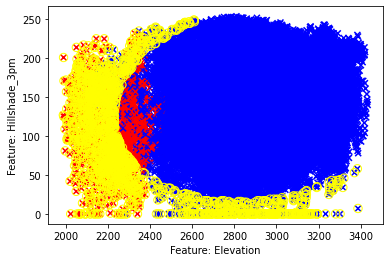

In [26]:
# plot two figures with anomalies circled
  #training set
y_pred_train = []
model = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
feature_train = x_train[[feature_pair_selected[0], feature_pair_selected[1]]].to_numpy()
model.fit(feature_train)
feature_compute = x_train[[feature_pair_selected[0], feature_pair_selected[1]]].to_numpy()
p_gm = model.score_samples(feature_compute)
for j in range (len(y_train)):
  if p_gm[j] < threshold: #predict anomaly
     y_pred_train.append(1)
  else:  #predict normal
     y_pred_train.append(0)

  # validation set
y_pred_val = []
model = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
feature_train = x_train[[feature_pair_selected[0], feature_pair_selected[1]]].to_numpy()
model.fit(feature_train)
feature_compute = x_val[[feature_pair_selected[0], feature_pair_selected[1]]].to_numpy()
p_gm = model.score_samples(feature_compute)
for j in range (len(y_val)):
  if p_gm[j] < threshold: #predict anomaly
     y_pred_val.append(1)
  else:  #predict normal
     y_pred_val.append(0)

assert len(y_pred_train)==len(y_train), "training set prediction and label length mismatch!"
assert len(y_pred_val)==len(y_val), "validation set prediction and label length mismatch!"

# draw the plot for training set
color = {0: 'blue',1:'red'} #non-anomalous blue and anomalous red
plt.scatter(x_train[feature_pair_selected[0]], x_train[feature_pair_selected[1]] , marker='x', c = y_train.map(color))
x_train_pred = x_train.copy()
x_train_pred['prediction'] = y_pred_train
x_train_anomaly = x_train_pred[x_train_pred['prediction'] == 1] # a training dataset with only anomaly data
plt.scatter(x_train_anomaly[feature_pair_selected[0]], x_train_anomaly[feature_pair_selected[1]] , marker='o', facecolor= "none",edgecolor="yellow",s=70)
plt.xlabel(f'Feature: {feature_pair_selected[0]}')
plt.ylabel(f'Feature: {feature_pair_selected[1]}')
print("For Training set: ")
plt.show()


For Validation set: 


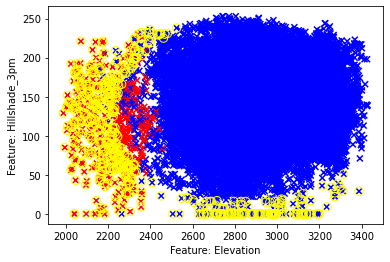

In [27]:
# draw the plot for validation set
color = {0: 'blue',1:'red'} #non-anomalous blue and anomalous red
plt.scatter(x_val[feature_pair_selected[0]], x_val[feature_pair_selected[1]] , marker='x', c = y_val.map(color))
x_val_pred = x_val.copy()
x_val_pred['prediction'] = y_pred_val
x_val_anomaly = x_val_pred[x_val_pred['prediction'] == 1] # a valid dataset with only anomaly data
plt.scatter(x_val_anomaly[feature_pair_selected[0]], x_val_anomaly[feature_pair_selected[1]] , marker='o', facecolor= "none",edgecolor="yellow",s=70)
plt.xlabel(f'Feature: {feature_pair_selected[0]}')
plt.ylabel(f'Feature: {feature_pair_selected[1]}')
print("For Validation set: ")
plt.show()


## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for anomalous and non-anomalous forests.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-anomalous forests** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**

  Ans: see cell #28
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **anomalous forests** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**

  Ans: see cell #28
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**

  Ans: see cell #28
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the forest is classified as anomalous. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the forest is anomalous (the forest belongs to the $G_2$ distribution which represents anomalous forests). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**

  Ans: see cell #28
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**

  Ans: see cell #29 and #30. We see that for both training and validation, the feature Elevation has the best F1 score with optimal c = 1.5, the values of F1, precision and recall are shown in the tables.
  6. Can we report AUC for this model? Why? **[0.5]**

  Ans: No we cannot report AUC for this model since this model contains two different gaussians, and AUC only represents the area under curve for a single gaussian (for a single set of sample scores). Since the 2 gaussians are fitted on different datasets (anomaly and non-anomaly), we cannot report the overall AUC for this model.

In [28]:
### YOUR CODE HERE ###
x_train_normal = x_train.copy() 
y_train_normal = y_train.copy()
x_train_normal['label'] = y_train_normal
x_train_normal = x_train_normal.loc[x_train_normal['label'] == 0]
x_train_normal = x_train_normal.drop(['label'],axis = 1)
y_train_normal = y_train_normal.loc[y_train_normal == 0]
assert len(x_train_normal) == len(y_train_normal), "non-anamalous training dataset length mismatch!"

x_train_anomaly = x_train.copy()
y_train_anomaly = y_train.copy()
x_train_anomaly['label'] = y_train_anomaly
x_train_anomaly = x_train_anomaly.loc[x_train_anomaly['label'] == 1]
x_train_anomaly = x_train_anomaly.drop(['label'],axis = 1)
y_train_anomaly = y_train_anomaly.loc[y_train_anomaly == 1]
assert len(x_train_anomaly) == len(y_train_anomaly), "anamalous training dataset length mismatch!"

def part4_1_to_4_val(feature):
  #Fit a Gaussian distribution ( 𝐺1 ) on a feature of non-anomalous forests
  feature_fit_1 = x_train_normal[feature].to_numpy().reshape(-1,1)
  G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G1.fit(feature_fit_1)
  #Fit another Gaussian distribution ( 𝐺2 ) on the same feature but for anomalous forests
  feature_fit_2 = x_train_anomaly[feature].to_numpy().reshape(-1,1)
  G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G2.fit(feature_fit_2)
  #Compute the score samples (𝑆) for both 𝐺1 and 𝐺2 on the validation set to get 𝑆1 and  𝑆2
  feature_compute = x_val[feature].to_numpy().reshape(-1,1)
  S1 = G1.score_samples(feature_compute)
  S2 = G2.score_samples(feature_compute)
  #Find an optimal  𝑐  (a real number) that maximizes validation set F1 Score
  f1_list =[]
  c_list = []
  precision_list = []
  recall_list = []
  for c in np.arange (0.0,10.1,0.1):
    y_predict = S1 < c*S2  #if S1 < c*S2, classify as anomalous with label 1
    y_predict = y_predict * 1 #convert True to 1 and False to 0
    f1 = f1_score(y_val, y_predict) 
    prec = precision_score(y_val, y_predict, zero_division = 1)
    recall = recall_score(y_val, y_predict)
    precision_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)
    c_list.append(c)
  #now choose the best f1 score and the corresponding best c
  f1_index = np.argmax(f1_list)
  f1_best = f1_list[f1_index]
  c_best = c_list[f1_index]
  prec_best = precision_list[f1_index]
  recall_best = recall_list[f1_index]

  return c_best, f1_best, prec_best, recall_best

def part4_1_to_4_train(feature):
  #Fit a Gaussian distribution ( 𝐺1 ) on a feature of non-anomalous forests
  feature_fit_1 = x_train_normal[feature].to_numpy().reshape(-1,1)
  G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G1.fit(feature_fit_1)
  #Fit another Gaussian distribution ( 𝐺2 ) on the same feature but for anomalous forests
  feature_fit_2 = x_train_anomaly[feature].to_numpy().reshape(-1,1)
  G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G2.fit(feature_fit_2)
  #Compute the score samples (𝑆) for both 𝐺1 and 𝐺2 on the training set to get 𝑆1 and  𝑆2
  feature_compute = x_train[feature].to_numpy().reshape(-1,1)
  S1 = G1.score_samples(feature_compute)
  S2 = G2.score_samples(feature_compute)
  #Find an optimal  𝑐  (a real number) that maximizes training set F1 Score
  f1_list =[]
  c_list = []
  precision_list = []
  recall_list = []
  for c in np.arange (0.0,10.1,0.1):
    y_predict = S1 < c*S2  #if S1 < c*S2, classify as anomalous with label 1
    y_predict = y_predict * 1 #convert True to 1 and False to 0
    f1 = f1_score(y_train, y_predict) 
    prec = precision_score(y_train, y_predict, zero_division = 1)
    recall = recall_score(y_train, y_predict)
    precision_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)
    c_list.append(c)
  #now choose the best f1 score and the corresponding best c
  f1_index = np.argmax(f1_list)
  f1_best = f1_list[f1_index]
  c_best = c_list[f1_index]
  prec_best = precision_list[f1_index]
  recall_best = recall_list[f1_index]

  return c_best, f1_best, prec_best, recall_best


In [29]:
#Repeat the steps 1 to 4 for all the features. 
all_features = list(x_train.columns)
c_list = []
f1_list = []
prec_list = []
recall_list = []
#first evaluate on training set
for feature in all_features:
  c, f1, prec, recall = part4_1_to_4_train(feature)
  c_list.append(c)
  f1_list.append(f1)
  prec_list.append(prec)
  recall_list.append(recall)
# show table for results
table = pd.DataFrame({'Feature': all_features, 
                      'best c': c_list,
                      'f1 score':f1_list,
                      'precision':prec_list,
                      'recall':recall_list
                     })

print("Training set: ")
table


Training set: 


,Feature,best c,f1 score,precision,recall
0,Elevation,1.5,0.886166,0.816173,0.969291
1,Aspect,1.0,0.022921,0.011624,0.814629
2,Slope,1.4,0.074728,0.049380,0.153546
3,Horizontal_Distance_To_Hydrology,1.1,0.042892,0.022137,0.687326
4,Vertical_Distance_To_Hydrology,1.0,0.028834,0.014758,0.623674
5,Horizontal_Distance_To_Roadways,1.1,0.053008,0.027318,0.889447
6,Hillshade_9am,1.1,0.056741,0.030172,0.475154
7,Hillshade_Noon,1.2,0.038444,0.024068,0.095477
8,Hillshade_3pm,1.3,0.120047,0.085680,0.200447
9,Horizontal_Distance_To_Fire_Points,1.2,0.048167,0.025888,0.345617


In [30]:
c_list = []
f1_list = []
prec_list = []
recall_list = []
#evaluate on validation set
for feature in all_features:
  c, f1, prec, recall = part4_1_to_4_val(feature)
  c_list.append(c)
  f1_list.append(f1)
  prec_list.append(prec)
  recall_list.append(recall)
# show table for results
table = pd.DataFrame({'Feature': all_features, 
                      'best c': c_list,
                      'f1 score':f1_list,
                      'precision':prec_list,
                      'recall':recall_list
                     })

print("Validation set: ")
table

Validation set: 


,Feature,best c,f1 score,precision,recall
0,Elevation,1.5,0.884971,0.812018,0.972325
1,Aspect,1.0,0.022852,0.011587,0.824723
2,Slope,1.3,0.061878,0.036220,0.212177
3,Horizontal_Distance_To_Hydrology,1.1,0.042573,0.021970,0.684502
4,Vertical_Distance_To_Hydrology,1.0,0.028551,0.014609,0.625461
5,Horizontal_Distance_To_Roadways,1.1,0.050837,0.026178,0.876384
6,Hillshade_9am,1.1,0.051639,0.027462,0.431734
7,Hillshade_Noon,1.2,0.038956,0.024323,0.097786
8,Hillshade_3pm,1.3,0.111588,0.078669,0.191882
9,Horizontal_Distance_To_Fire_Points,1.2,0.052632,0.028233,0.387454


## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on non-anomalous forests or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


Ans: To improve the running time, the time complexity of finding the optimal threshold has been modified to O(n) by setting step_size = int(len(labels)/100). We see that overall, the models fitted with non-anomaly data performs better than the models fitted with anomaly data. Also, models fitted with the most important 1~3 features perform better than the model fitted with all features. When fitting on non-anomalous data, we usually need only 1 component since the data is usually clustered around a single center. When fitting on anomalous data, we need multiple components since the distribution of anomalous data is separated into several clusters. 

The best model is model#12: 

3 features: Elevation, Horizontal_Distance_To_Fire_Points, Vertical_Distance_To_Hydrology	

2 Gaussians: G1 fitted on non-anomaly data with single component, G2 fitted on anomaly data with 2 components

The AUC cannot be reported and thresholds are replaced by c values in part4.

Please see the table below for details.

**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid forests and multiple components for anomalous ones! Why does it make sense to have multiple components for the anomalous forests?

In [31]:
### YOUR CODE HERE ###
       
def compute_AUC(evaluate_set, model,feature, x_train, y_train, y_val):
  if evaluate_set == 'train' and len(feature) == 1:
    feature_train = x_train[feature[0]].to_numpy().reshape(-1,1)
    model.fit(feature_train)
    feature_val = feature_train
    scores = model.score_samples(feature_val) 
    y_compute = y_train 
    fpr_sc, tpr_sc, _= roc_curve(y_compute, -1*scores)
    auc_train = auc(fpr_sc, tpr_sc)
    return auc_train

  elif evaluate_set == 'train' and len(feature) > 1:
    feature_train = x_train[feature].to_numpy()
    model.fit(feature_train)
    feature_val = feature_train
    scores = model.score_samples(feature_val) 
    y_compute = y_train 
    fpr_sc, tpr_sc, _= roc_curve(y_compute, -1*scores)
    auc_train = auc(fpr_sc, tpr_sc)
    return auc_train

  elif evaluate_set == 'val' and len(feature) == 1:
    feature_train = x_train[feature[0]].to_numpy().reshape(-1,1)
    model.fit(feature_train)
    feature_val = x_val[feature[0]].to_numpy().reshape(-1,1)
    scores = model.score_samples(feature_val) 
    y_compute = y_val 
    fpr_sc, tpr_sc, _= roc_curve(y_compute, -1*scores)
    auc_val = auc(fpr_sc, tpr_sc)
    return auc_val

  elif evaluate_set == 'val' and len(feature) > 1:
    feature_train = x_train[feature].to_numpy()
    model.fit(feature_train)
    feature_val = x_val[feature].to_numpy()
    scores = model.score_samples(feature_val) 
    y_compute = y_val 
    fpr_sc, tpr_sc, _= roc_curve(y_compute, -1*scores)
    auc_val = auc(fpr_sc, tpr_sc)
    return auc_val

  else:
    print("ERROR: evaluation set is wrong.")
    return None

def part5_tune(model, feature, evaluate_set, x_train, y_train, x_val, y_val): 
  if len(feature) == 1 and evaluate_set == 'val': #only 1 feature
    feature_train = x_train[feature[0]].to_numpy().reshape(-1,1)
    model.fit(feature_train)
    feature_val = x_val[feature[0]].to_numpy().reshape(-1,1)
    p_gm = model.score_samples(feature_val) 
    step_size = int(len(y_train)/100)
    f1_list = []
    tr_list = []
    prec_list = []
    recall_list =[]
    for i in range (0, len(y_val), step_size):
      y_prediction = []
      tr = sorted(p_gm)[i] #We sort the points by probability, fix a threshold here
      for j in range (len(y_val)):
        if p_gm[j] < tr: #predict anomaly
          y_prediction.append(1)
        else:  #predict normal
          y_prediction.append(0)
      f1 = f1_score(y_val, y_prediction,zero_division=1)
      precision = precision_score(y_val, y_prediction,zero_division=1)
      recall = recall_score(y_val, y_prediction, zero_division=1)
      f1_list.append(f1)
      tr_list.append(tr)
      prec_list.append(precision)
      recall_list.append(recall)
    #now choose the best f1 score and the corresponding best threshold
    f1_index = np.argmax(f1_list)
    f1_best = f1_list[f1_index]
    threshold = tr_list[f1_index]
    precision = prec_list[f1_index]
    recall = recall_list[f1_index]

    return f1_best, precision, recall, threshold

  elif len(feature) == 1 and evaluate_set == 'train': 
    feature_train = x_train[feature[0]].to_numpy().reshape(-1,1)
    model.fit(feature_train)
    feature_val = feature_train
    p_gm = model.score_samples(feature_val) 
    step_size = int(len(y_train)/100)
    f1_list = []
    tr_list = []
    prec_list = []
    recall_list =[]
    for i in range (0, len(y_train), step_size):
      y_prediction = []
      tr = sorted(p_gm)[i] #We sort the points by probability, fix a threshold here
      for j in range (len(y_train)):
        if p_gm[j] < tr: #predict anomaly
          y_prediction.append(1)
        else:  #predict normal
          y_prediction.append(0)
      f1 = f1_score(y_train, y_prediction,zero_division=1)
      precision = precision_score(y_train, y_prediction,zero_division=1)
      recall = recall_score(y_train, y_prediction, zero_division=1)
      f1_list.append(f1)
      tr_list.append(tr)
      prec_list.append(precision)
      recall_list.append(recall)
    #now choose the best f1 score and the corresponding best threshold
    f1_index = np.argmax(f1_list)
    f1_best = f1_list[f1_index]
    threshold = tr_list[f1_index]
    precision = prec_list[f1_index]
    recall = recall_list[f1_index]

    return f1_best, precision, recall, threshold

  elif len(feature) > 1 and evaluate_set == 'train':  #multi-features
    feature_train = x_train[feature].to_numpy()
    model.fit(feature_train)
    feature_val = feature_train
    p_gm = model.score_samples(feature_val) 
    step_size = int(len(y_train)/100)
    f1_list = []
    tr_list = []
    prec_list = []
    recall_list =[]
    for i in range (0, len(y_train), step_size):
      y_prediction = []
      tr = sorted(p_gm)[i] #We sort the points by probability, fix a threshold here
      for j in range (len(y_train)):
        if p_gm[j] < tr: #predict anomaly
          y_prediction.append(1)
        else:  #predict normal
          y_prediction.append(0)
      f1 = f1_score(y_train, y_prediction,zero_division=1)
      precision = precision_score(y_train, y_prediction,zero_division=1)
      recall = recall_score(y_train, y_prediction, zero_division=1)
      f1_list.append(f1)
      tr_list.append(tr)
      prec_list.append(precision)
      recall_list.append(recall)
    #now choose the best f1 score and the corresponding best threshold
    f1_index = np.argmax(f1_list)
    f1_best = f1_list[f1_index]
    threshold = tr_list[f1_index]
    precision = prec_list[f1_index]
    recall = recall_list[f1_index]

    return f1_best, precision, recall, threshold

  elif len(feature) > 1 and evaluate_set == 'val': 
    feature_train = x_train[feature].to_numpy()
    model.fit(feature_train)
    feature_val = x_val[feature].to_numpy()
    p_gm = model.score_samples(feature_val) 
    step_size = int(len(y_train)/100)
    f1_list = []
    tr_list = []
    prec_list = []
    recall_list =[]
    for i in range (0, len(y_val), step_size):
      y_prediction = []
      tr = sorted(p_gm)[i] #We sort the points by probability, fix a threshold here
      for j in range (len(y_val)):
        if p_gm[j] < tr: #predict anomaly
          y_prediction.append(1)
        else:  #predict normal
          y_prediction.append(0)
      f1 = f1_score(y_val, y_prediction,zero_division=1)
      precision = precision_score(y_val, y_prediction, zero_division=1)
      recall = recall_score(y_val, y_prediction, zero_division=1)
      f1_list.append(f1)
      tr_list.append(tr)
      prec_list.append(precision)
      recall_list.append(recall)
    #now choose the best f1 score and the corresponding best threshold
    f1_index = np.argmax(f1_list)
    f1_best = f1_list[f1_index]
    threshold = tr_list[f1_index]
    precision = prec_list[f1_index]
    recall = recall_list[f1_index]

    return f1_best, precision, recall, threshold

  else:
    print("ERROR: IN tuneing the model.")
    return None

def part5(model, feature, x_train, y_train, x_val, y_val):
  #compute AUC on both training and validation set
    auc_train = compute_AUC('train', model,feature, x_train, y_train, y_val)
    auc_val = compute_AUC('val', model,feature, x_train, y_train, y_val)
  #the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets
    f1_train, prec_train, recall_train, threshold_train = part5_tune(model, feature, 'train', x_train, y_train, x_val, y_val)
    f1_val, prec_val, recall_val, threshold_val = part5_tune(model, feature, 'val', x_train, y_train, x_val, y_val)
    return auc_train, auc_val, f1_train, prec_train, recall_train, threshold_train, f1_val, prec_val, recall_val, threshold_val

 

In [32]:
#try 12 different models
model_list = [1,2,3,4,5,6,7,8,9,10,11,12]
auc_train_list =[]
auc_val_list = []
f1_train_list =[]
f1_val_list = []
prec_train_list =[]
prec_val_list =[]
recall_train_list =[]
recall_val_list =[]
threshold_train_list =[]
threshold_val_list =[]

#model1: single component gaussian for all features on both classes
print("model1")
model = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
feature = list(x_train.columns)
auc_train, auc_val, f1_train, prec_train, recall_train, threshold_train, f1_val, prec_val, recall_val, threshold_val= part5(model, feature, x_train, y_train, x_val, y_val)
auc_train_list.append(auc_train)
auc_val_list.append(auc_val)
f1_train_list.append(f1_train)
f1_val_list.append(f1_val)
prec_train_list.append(prec_train)
prec_val_list.append(prec_val)
recall_train_list.append(recall_train)
recall_val_list.append(recall_val)
threshold_train_list.append(threshold_train)
threshold_val_list.append(threshold_val)

#model2: single component gaussian for 1st feature on both classes
print("model2")
model = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
feature = [features[0]]
auc_train, auc_val, f1_train, prec_train, recall_train, threshold_train, f1_val, prec_val, recall_val, threshold_val= part5(model, feature, x_train, y_train, x_val, y_val)
auc_train_list.append(auc_train)
auc_val_list.append(auc_val)
f1_train_list.append(f1_train)
f1_val_list.append(f1_val)
prec_train_list.append(prec_train)
prec_val_list.append(prec_val)
recall_train_list.append(recall_train)
recall_val_list.append(recall_val)
threshold_train_list.append(threshold_train)
threshold_val_list.append(threshold_val)

#model3: single component gaussian for 1st& 2nd feature on both classes
print("model3")
model = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
feature = features[0:2]
auc_train, auc_val, f1_train, prec_train, recall_train, threshold_train, f1_val, prec_val, recall_val, threshold_val= part5(model, feature, x_train, y_train, x_val, y_val)
auc_train_list.append(auc_train)
auc_val_list.append(auc_val)
f1_train_list.append(f1_train)
f1_val_list.append(f1_val)
prec_train_list.append(prec_train)
prec_val_list.append(prec_val)
recall_train_list.append(recall_train)
recall_val_list.append(recall_val)
threshold_train_list.append(threshold_train)
threshold_val_list.append(threshold_val)

#model4: single component gaussian for 1st feature on non-anomaly data
print("model4")
model = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
feature = [features[0]]
auc_train, auc_val, f1_train, prec_train, recall_train, threshold_train, f1_val, prec_val, recall_val, threshold_val= part5(model, feature, x_train_normal, y_train_normal, x_val, y_val)
auc_train_list.append(auc_train)
auc_val_list.append(auc_val)
f1_train_list.append(f1_train)
f1_val_list.append(f1_val)
prec_train_list.append(prec_train)
prec_val_list.append(prec_val)
recall_train_list.append(recall_train)
recall_val_list.append(recall_val)
threshold_train_list.append(threshold_train)
threshold_val_list.append(threshold_val)

#model5: single component gaussian for 1st feature on anomaly data
print("model5")
model = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
feature = [features[0]]
auc_train, auc_val, f1_train, prec_train, recall_train, threshold_train, f1_val, prec_val, recall_val, threshold_val= part5(model, feature, x_train_anomaly, y_train_anomaly, x_val, y_val)
auc_train_list.append(auc_train)
auc_val_list.append(auc_val)
f1_train_list.append(f1_train)
f1_val_list.append(f1_val)
prec_train_list.append(prec_train)
prec_val_list.append(prec_val)
recall_train_list.append(recall_train)
recall_val_list.append(recall_val)
threshold_train_list.append(threshold_train)
threshold_val_list.append(threshold_val)

#model6: 2 components gaussian for 1st feature on both classes
print("model6")
model = GaussianMixture(n_components = 2, covariance_type = 'full', random_state = 0)
feature = [features[0]]
auc_train, auc_val, f1_train, prec_train, recall_train, threshold_train, f1_val, prec_val, recall_val, threshold_val= part5(model, feature, x_train, y_train, x_val, y_val)
auc_train_list.append(auc_train)
auc_val_list.append(auc_val)
f1_train_list.append(f1_train)
f1_val_list.append(f1_val)
prec_train_list.append(prec_train)
prec_val_list.append(prec_val)
recall_train_list.append(recall_train)
recall_val_list.append(recall_val)
threshold_train_list.append(threshold_train)
threshold_val_list.append(threshold_val)

#model7: 2 components gaussian for 1st and 2nd feature on both classes
print("model7")
model = GaussianMixture(n_components = 2, covariance_type = 'full', random_state = 0)
feature = features[0:2]
auc_train, auc_val, f1_train, prec_train, recall_train, threshold_train, f1_val, prec_val, recall_val, threshold_val= part5(model, feature, x_train, y_train, x_val, y_val)
auc_train_list.append(auc_train)
auc_val_list.append(auc_val)
f1_train_list.append(f1_train)
f1_val_list.append(f1_val)
prec_train_list.append(prec_train)
prec_val_list.append(prec_val)
recall_train_list.append(recall_train)
recall_val_list.append(recall_val)
threshold_train_list.append(threshold_train)
threshold_val_list.append(threshold_val)

#model8: 2 components gaussian for 1st feature on non_anomaly data
print("model8")
model = GaussianMixture(n_components = 2, covariance_type = 'full', random_state = 0)
feature = [features[0]]
auc_train, auc_val, f1_train, prec_train, recall_train, threshold_train, f1_val, prec_val, recall_val, threshold_val= part5(model, feature, x_train_normal, y_train_normal, x_val, y_val)
auc_train_list.append(auc_train)
auc_val_list.append(auc_val)
f1_train_list.append(f1_train)
f1_val_list.append(f1_val)
prec_train_list.append(prec_train)
prec_val_list.append(prec_val)
recall_train_list.append(recall_train)
recall_val_list.append(recall_val)
threshold_train_list.append(threshold_train)
threshold_val_list.append(threshold_val)

#model9: 2 components gaussian for 1st feature on anomaly data
print("model9")
model = GaussianMixture(n_components = 2, covariance_type = 'full', random_state = 0)
feature = [features[0]]
auc_train, auc_val, f1_train, prec_train, recall_train, threshold_train, f1_val, prec_val, recall_val, threshold_val= part5(model, feature, x_train_anomaly, y_train_anomaly, x_val, y_val)
auc_train_list.append(auc_train)
auc_val_list.append(auc_val)
f1_train_list.append(f1_train)
f1_val_list.append(f1_val)
prec_train_list.append(prec_train)
prec_val_list.append(prec_val)
recall_train_list.append(recall_train)
recall_val_list.append(recall_val)
threshold_train_list.append(threshold_train)
threshold_val_list.append(threshold_val)

#model10: 4 components gaussian for 1st and 2nd, 3rd feature on non_anomaly data
print("model10")
model = GaussianMixture(n_components = 4, covariance_type = 'full', random_state = 0)
feature = features[0:3]
auc_train, auc_val, f1_train, prec_train, recall_train, threshold_train, f1_val, prec_val, recall_val, threshold_val= part5(model, feature, x_train_normal, y_train_normal, x_val, y_val)
auc_train_list.append(auc_train)
auc_val_list.append(auc_val)
f1_train_list.append(f1_train)
f1_val_list.append(f1_val)
prec_train_list.append(prec_train)
prec_val_list.append(prec_val)
recall_train_list.append(recall_train)
recall_val_list.append(recall_val)
threshold_train_list.append(threshold_train)
threshold_val_list.append(threshold_val)

#model11: 4 components gaussian for 1st and 2nd, 3rd feature on anomaly data
print("model11")
model = GaussianMixture(n_components = 4, covariance_type = 'full', random_state = 0)
feature = features[0:3]
auc_train, auc_val, f1_train, prec_train, recall_train, threshold_train, f1_val, prec_val, recall_val, threshold_val= part5(model, feature, x_train_anomaly, y_train_anomaly, x_val, y_val)
auc_train_list.append(auc_train)
auc_val_list.append(auc_val)
f1_train_list.append(f1_train)
f1_val_list.append(f1_val)
prec_train_list.append(prec_train)
prec_val_list.append(prec_val)
recall_train_list.append(recall_train)
recall_val_list.append(recall_val)
threshold_train_list.append(threshold_train)
threshold_val_list.append(threshold_val)



model1
model2
model3
model4


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


model5


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


model6
model7
model8


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


model9


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


model10


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


model11


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


In [33]:
#model12: a two gaussian model, multiple features, single component for valid forests and multiple components for anomalous ones
def part5_model12_val(feature):
  #Fit a Gaussian distribution ( 𝐺1 ) on a feature of non-anomalous forests
  feature_fit_1 = x_train_normal[feature].to_numpy()
  G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G1.fit(feature_fit_1)
  #Fit another Gaussian distribution ( 𝐺2 ) on the same feature but for anomalous forests
  feature_fit_2 = x_train_anomaly[feature].to_numpy()
  G2 = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
  G2.fit(feature_fit_2)
  #Compute the score samples (𝑆) for both 𝐺1 and 𝐺2 on the validation set to get 𝑆1 and  𝑆2
  feature_compute = x_val[feature].to_numpy()
  S1 = G1.score_samples(feature_compute)
  S2 = G2.score_samples(feature_compute)
  #Find an optimal  𝑐  (a real number) that maximizes validation set F1 Score
  f1_list =[]
  c_list = []
  precision_list = []
  recall_list = []
  for c in np.arange (0.0,10.1,0.1):
    y_predict = S1 < c*S2  #if S1 < c*S2, classify as anomalous with label 1
    y_predict = y_predict * 1 #convert True to 1 and False to 0
    f1 = f1_score(y_val, y_predict) 
    prec = precision_score(y_val, y_predict, zero_division = 1)
    recall = recall_score(y_val, y_predict)
    precision_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)
    c_list.append(c)
  #now choose the best f1 score and the corresponding best c
  f1_index = np.argmax(f1_list)
  f1_best = f1_list[f1_index]
  c_best = c_list[f1_index]
  prec_best = precision_list[f1_index]
  recall_best = recall_list[f1_index]

  return  f1_best, prec_best, recall_best,c_best

def part5_model12_train(feature):
  #Fit a Gaussian distribution ( 𝐺1 ) on a feature of non-anomalous forests
  feature_fit_1 = x_train_normal[feature].to_numpy()
  G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G1.fit(feature_fit_1)
  #Fit another Gaussian distribution ( 𝐺2 ) on the same feature but for anomalous forests
  feature_fit_2 = x_train_anomaly[feature].to_numpy()
  G2 = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
  G2.fit(feature_fit_2)
  #Compute the score samples (𝑆) for both 𝐺1 and 𝐺2 on the training set to get 𝑆1 and  𝑆2
  feature_compute = x_train[feature].to_numpy()
  S1 = G1.score_samples(feature_compute)
  S2 = G2.score_samples(feature_compute)
  #Find an optimal  𝑐  (a real number) that maximizes training set F1 Score
  f1_list =[]
  c_list = []
  precision_list = []
  recall_list = []
  for c in np.arange (0.0,10.1,0.1):
    y_predict = S1 < c*S2  #if S1 < c*S2, classify as anomalous with label 1
    y_predict = y_predict * 1 #convert True to 1 and False to 0
    f1 = f1_score(y_train, y_predict) 
    prec = precision_score(y_train, y_predict, zero_division = 1)
    recall = recall_score(y_train, y_predict)
    precision_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)
    c_list.append(c)
  #now choose the best f1 score and the corresponding best c
  f1_index = np.argmax(f1_list)
  f1_best = f1_list[f1_index]
  c_best = c_list[f1_index]
  prec_best = precision_list[f1_index]
  recall_best = recall_list[f1_index]

  return f1_best, prec_best, recall_best, c_best

# model 12
print("model 12")
feature = features[0:3]
f1_train, prec_train, recall_train, c_train = part5_model12_train(feature)
f1_val, prec_val, recall_val, c_val = part5_model12_val(feature)

auc_train_list.append(None) # no AUC to report
auc_val_list.append(None)
f1_train_list.append(f1_train)
f1_val_list.append(f1_val)
prec_train_list.append(prec_train)
prec_val_list.append(prec_val)
recall_train_list.append(recall_train)
recall_val_list.append(recall_val)
threshold_train_list.append(c_train)
threshold_val_list.append(c_val)

model 12


In [34]:
# show results in a table
table = pd.DataFrame({'Model #': model_list, 
                      'AUC_train': auc_train_list,
                      'AUC_val':auc_val_list,
                      'f1_train':f1_train_list,
                      'f1_val':f1_val_list,
                      'precision_train': prec_train_list,
                      'precision_val': prec_val_list,
                      'recall_train': recall_train_list,
                      'recall_val': recall_val_list,
                      'threshold_train': threshold_train_list,
                      'threshold_val': threshold_val_list
                     })

print("Evaluating Models: ")
table

Evaluating Models: 


,Model #,AUC_train,AUC_val,f1_train,f1_val,precision_train,precision_val,recall_train,recall_val,threshold_train,threshold_val
0,1,0.935499,0.932782,0.173349,0.178873,0.100592,0.102474,0.626466,0.702952,-61.406956,-61.228169
1,2,0.999354,0.999405,0.869279,0.454317,0.853606,0.293926,0.885539,1.000000,-10.332189,-8.182907
2,3,0.993894,0.993852,0.644384,0.415660,0.632598,0.268424,0.656616,0.920664,-19.919593,-18.507896
3,4,NaN,0.999418,1.000000,0.455845,1.000000,0.295207,1.000000,1.000000,-14.876551,-8.400954
4,5,NaN,0.001136,0.996920,0.018336,1.000000,0.009255,0.993858,0.974170,-5.535006,-5.535374
5,6,0.999004,0.999019,0.828078,0.451316,0.813578,0.291734,0.843104,0.996310,-9.841202,-8.223131
6,7,0.995123,0.995045,0.662466,0.438151,0.650350,0.282948,0.675042,0.970480,-19.094890,-17.508438
7,8,NaN,0.999346,1.000000,0.456733,1.000000,0.296114,1.000000,0.998155,-16.039950,-8.388730
8,9,NaN,0.001318,0.996920,0.018405,1.000000,0.009290,0.993858,0.977860,-5.570388,-5.570825
9,10,NaN,0.986440,1.000000,0.392782,1.000000,0.254210,1.000000,0.863469,-40.463600,-23.666992


## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**

Ans: Model #12 works best. Please see below.

In [35]:
### YOUR CODE HERE ###
#best model#12

def part6_model12_test(feature):
  #Fit a Gaussian distribution ( 𝐺1 ) on a feature of non-anomalous forests
  feature_fit_1 = x_train_normal[feature].to_numpy()
  G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G1.fit(feature_fit_1)
  #Fit another Gaussian distribution ( 𝐺2 ) on the same feature but for anomalous forests
  feature_fit_2 = x_train_anomaly[feature].to_numpy()
  G2 = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
  G2.fit(feature_fit_2)
  #Compute the score samples (𝑆) for both 𝐺1 and 𝐺2 on the validation set to get 𝑆1 and  𝑆2
  feature_compute = x_test[feature].to_numpy()
  S1 = G1.score_samples(feature_compute)
  S2 = G2.score_samples(feature_compute)
  #Find an optimal  𝑐  (a real number) that maximizes validation set F1 Score
  f1_list =[]
  c_list = []
  precision_list = []
  recall_list = []
  for c in np.arange (0.0,10.1,0.1):
    y_predict = S1 < c*S2  #if S1 < c*S2, classify as anomalous with label 1
    y_predict = y_predict * 1 #convert True to 1 and False to 0
    f1 = f1_score(y_test, y_predict) 
    prec = precision_score(y_test, y_predict, zero_division = 1)
    recall = recall_score(y_test, y_predict)
    precision_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)
    c_list.append(c)
  #now choose the best f1 score and the corresponding best c
  f1_index = np.argmax(f1_list)
  f1_best = f1_list[f1_index]
  c_best = c_list[f1_index]
  prec_best = precision_list[f1_index]
  recall_best = recall_list[f1_index]

  return  f1_best, prec_best, recall_best


# run model on test set
feature = features[0:3]
f1_score, precision, recall = part6_model12_test(feature)
print(f"Model 12: F1 score: {f1_score}, precision: {precision}, recall: {recall}")

Model 12: F1 score: 0.9101654846335697, precision: 0.8912037037037037, recall: 0.9299516908212561


## **Bonus Part: Using the Precision Recall Curve: [1 Mark]**
Repeat Part 2 using the Precision Recall Curve instead of the ROC curve.

In [36]:
### YOUR CODE HERE ###
# a. Fitting regardless of class:
import sklearn
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_recall_curve

features = list(x_train.columns)
auc_list_train = []
auc_list_val = []
gau_model = GaussianMixture(n_components=1, covariance_type = 'full', random_state=0)

#calculate AUC for each feature on training set
for feature in features:
  feature_to_fit = x_train[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_to_fit) # fit on full training set
  feature_to_compute = feature_to_fit # compute AUC for training set
  p = gau_model.score_samples(feature_to_compute) #compute auc based on both train and val
  y_compute = y_train 
  precision,recall, _= precision_recall_curve(y_compute, -1*p)
  auc_list_train.append(auc(recall, precision))

#calculate AUC for each feature on valid set
for feature in features:
  feature_to_fit = x_train[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_to_fit) # fit on full training set
  feature_to_compute = x_val[feature].to_numpy().reshape(-1,1) # compute AUC for valid set
  p = gau_model.score_samples(feature_to_compute) #compute auc based on both train and val
  y_compute = y_val 
  precision,recall, _= precision_recall_curve(y_compute, -1*p)
  auc_list_val.append(auc(recall, precision))


print("The AUC table based on training set: ")
table_train_2a = pd.DataFrame({'Feature' : features, 'AUC' : auc_list_train})    
table_train_2a



The AUC table based on training set: 


,Feature,AUC
0,Elevation,0.927383
1,Aspect,0.007252
2,Slope,0.024076
3,Horizontal_Distance_To_Hydrology,0.015604
4,Vertical_Distance_To_Hydrology,0.013520
5,Horizontal_Distance_To_Roadways,0.011101
6,Hillshade_9am,0.015705
7,Hillshade_Noon,0.013273
8,Hillshade_3pm,0.040368
9,Horizontal_Distance_To_Fire_Points,0.014018


In [37]:
print("The AUC table based on validation set: ")
table_val_2a = pd.DataFrame({'Feature' : features, 'AUC' : auc_list_val})    
table_val_2a

The AUC table based on validation set: 


,Feature,AUC
0,Elevation,0.938869
1,Aspect,0.007190
2,Slope,0.020804
3,Horizontal_Distance_To_Hydrology,0.015039
4,Vertical_Distance_To_Hydrology,0.013213
5,Horizontal_Distance_To_Roadways,0.010848
6,Hillshade_9am,0.014738
7,Hillshade_Noon,0.012945
8,Hillshade_3pm,0.033918
9,Horizontal_Distance_To_Fire_Points,0.013946


In [38]:
#Find the best 3 features to distinguish anomalous forests from non-anomalous forests based on the AUC of the validation set.
table_val_2a['rank'] = table_val_2a['AUC'].rank(ascending = False)
features_selected = table_val_2a.loc[table_val_2a['rank'].isin([1,2,3])]
feature_selected = features_selected.sort_values("rank")
feature_selected

,Feature,AUC,rank
0,Elevation,0.938869,1.0
8,Hillshade_3pm,0.033918,2.0
2,Slope,0.020804,3.0


In [39]:
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#Make a prediction based on a model's scores:
features = list(features_selected['Feature'])
f1s = []
thresholds = []
precisions = []
recalls = []
def find_threshold(feature): #find the best threshold value and the maximum F1 score given a feature
    feature_train = x_train[feature].to_numpy().reshape(-1,1)
    gau_model.fit(feature_train)
    feature_val = x_val[feature].to_numpy().reshape(-1,1)
    p_gm = gau_model.score_samples(feature_val) # get the scores on validation set
    
    step_size = 100
    f1_list = []
    tr_list = []
    for i in range (0, len(y_val), step_size):
      y_prediction = []
      tr = sorted(p_gm)[i] #We sort the points by probability, fix a threshold here
      for j in range (len(y_val)):
        if p_gm[j] < tr: #predict anomaly
          y_prediction.append(1)
        else:  #predict normal
          y_prediction.append(0)
      f1 = f1_score(y_val, y_prediction)
      f1_list.append(f1)
      tr_list.append(tr)
    #now choose the best f1 score and the corresponding best threshold
    f1_index = np.argmax(f1_list)
    f1_best = f1_list[f1_index]
    threshold = tr_list[f1_index]
    return f1_best, threshold        

      
for feature in features:
  f1, tr = find_threshold(feature)
  print(f"Feature: {feature}, best F1: {f1}, optimal threshold: {tr}")
  thresholds.append(tr)

#Report Precision, Recall and F1 score on both training and validation set in a table using the threshold
i = 0
for feature in features:
  feature_train = x_train[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_train)
  p_gm = gau_model.score_samples(feature_train)
  precision = precision_score(y_train, p_gm < thresholds[i])
  recall = recall_score(y_train, p_gm < thresholds[i])
  f1 = f1_score(y_train, p_gm < thresholds[i])
  i = i+1
  precisions.append(precision)
  recalls.append(recall)
  f1s.append(f1)
#Report on training set
print("Training set: ")
table = pd.DataFrame({'Feature' : features, 'optimal threshold' : thresholds, 'precision': precisions, 'recall': recalls, 'f1': f1s})    
table

Feature: Elevation, best F1: 0.8754385964912281, optimal threshold: -10.11731938407701
Feature: Slope, best F1: 0.06263982102908278, optimal threshold: -4.702143499153053
Feature: Hillshade_3pm, best F1: 0.08095061269959153, optimal threshold: -6.7618807046826515
Training set: 


,Feature,optimal threshold,precision,recall,f1
0,Elevation,-10.117319,0.841891,0.924623,0.881320
1,Slope,-4.702143,0.044681,0.208264,0.073577
2,Hillshade_3pm,-6.761881,0.054235,0.207705,0.086012


In [40]:
i = 0
precisions_val = []
recalls_val = []
f1s_val = []
for feature in features:
  feature_train = x_train[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_train)
  feature_val = x_val[feature].to_numpy().reshape(-1,1)
  p_gm = gau_model.score_samples(feature_val)
  precision = precision_score(y_val, p_gm < thresholds[i])
  recall = recall_score(y_val, p_gm < thresholds[i])
  f1 = f1_score(y_val, p_gm < thresholds[i])
  i = i+1
  precisions_val.append(precision)
  recalls_val.append(recall)
  f1s_val.append(f1)
# Report on valid set
print("Validation set: ")
table = pd.DataFrame({'Feature' : features, 'optimal threshold' : thresholds, 'precision': precisions_val, 'recall': recalls_val, 'f1': f1s_val})    
table

Validation set: 


,Feature,optimal threshold,precision,recall,f1
0,Elevation,-10.117319,0.834448,0.920664,0.875439
1,Slope,-4.702143,0.037882,0.180812,0.062640
2,Hillshade_3pm,-6.761881,0.050674,0.201107,0.080951


In [41]:
#b.Fitting based on class, only fit Gaussian on non-anomalous data
#compute AUC, F1 score, Precision and Recall 
  # first create non-anomalous training set
x_train_normal = x_train.copy() 
y_train_normal = y_train.copy()
x_train_normal['label'] = y_train_normal
x_train_normal = x_train_normal.loc[x_train_normal['label'] == 0]
x_train_normal = x_train_normal.drop(['label'],axis = 1)
y_train_normal = y_train_normal.loc[y_train_normal == 0]
assert len(x_train_normal) == len(y_train_normal), "non-anamalous training dataset length mismatch!"

features = list(x_train_normal.columns)
auc_list_train = []
auc_list_val = []
gau_model = GaussianMixture(n_components=1, covariance_type = 'full', random_state=0)

#calculate AUC for each feature on training set
for feature in features:
  feature_to_fit = x_train_normal[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_to_fit) # fit on full training set
  feature_to_compute = x_train[feature].to_numpy().reshape(-1,1) # compute AUC for training set
  p = gau_model.score_samples(feature_to_compute) #compute auc based on both train and val
  y_compute = y_train 
  precision,recall, _= precision_recall_curve(y_compute, -1*p)
  auc_list_train.append(auc(recall, precision))

#calculate AUC for each feature on valid set
for feature in features:
  feature_to_fit = x_train_normal[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_to_fit) # fit on full training set
  feature_to_compute = x_val[feature].to_numpy().reshape(-1,1) # compute AUC for valid set
  p = gau_model.score_samples(feature_to_compute) #compute auc based on both train and val
  y_compute = y_val 
  precision,recall, _= precision_recall_curve(y_compute, -1*p)
  auc_list_val.append(auc(recall, precision))


print("The AUC table based on training set: ")
table_train = pd.DataFrame({'Feature' : features, 'AUC' : auc_list_train})    
table_train


The AUC table based on training set: 


,Feature,AUC
0,Elevation,0.927676
1,Aspect,0.007252
2,Slope,0.024076
3,Horizontal_Distance_To_Hydrology,0.015666
4,Vertical_Distance_To_Hydrology,0.013520
5,Horizontal_Distance_To_Roadways,0.011181
6,Hillshade_9am,0.016018
7,Hillshade_Noon,0.013273
8,Hillshade_3pm,0.040368
9,Horizontal_Distance_To_Fire_Points,0.014108


In [42]:
print("The AUC table based on validation set: ")
table_val = pd.DataFrame({'Feature' : features, 'AUC' : auc_list_val})    
table_val

The AUC table based on validation set: 


,Feature,AUC
0,Elevation,0.939170
1,Aspect,0.007190
2,Slope,0.020804
3,Horizontal_Distance_To_Hydrology,0.015081
4,Vertical_Distance_To_Hydrology,0.013213
5,Horizontal_Distance_To_Roadways,0.010927
6,Hillshade_9am,0.015010
7,Hillshade_Noon,0.012945
8,Hillshade_3pm,0.033918
9,Horizontal_Distance_To_Fire_Points,0.014031


In [43]:
#Find the best 3 features to distinguish anomalous forests from non-anomalous forests based on the AUC of the validation set.
table_val['rank'] = table_val['AUC'].rank(ascending = False)
features_selected_val_2b = table_val.loc[table_val['rank'].isin([1,2,3])]
features_selected_val_2b = features_selected_val_2b.sort_values("rank")
#Find the best 3 features to distinguish anomalous forests from non-anomalous forests based on the AUC of the training set.
table_train['rank'] = table_train['AUC'].rank(ascending = False)
features_selected_train_2b = table_train.loc[table_train['rank'].isin([1,2,3])]
features_selected_train_2b = features_selected_train_2b.sort_values("rank")

features_selected_train_2b

,Feature,AUC,rank
0,Elevation,0.927676,1.0
8,Hillshade_3pm,0.040368,2.0
2,Slope,0.024076,3.0


In [44]:
#Make a prediction based on a model's scores:
features = list(features_selected['Feature'])
f1s_2b = []
thresholds_2b = []
precisions_2b = []
recalls_2b = []
def find_threshold(feature): #find the best threshold value and the maximum F1 score given a feature
    feature_train = x_train_normal[feature].to_numpy().reshape(-1,1)
    gau_model.fit(feature_train)
    feature_val = x_val[feature].to_numpy().reshape(-1,1)
    p_gm = gau_model.score_samples(feature_val) # get the scores on validation set
    
    step_size = 100
    f1_list = []
    tr_list = []
    for i in range (0, len(y_val), step_size):
      y_prediction = []
      tr = sorted(p_gm)[i] #We sort the points by probability, fix a threshold here
      for j in range (len(y_val)):
        if p_gm[j] < tr: #predict anomaly
          y_prediction.append(1)
        else:  #predict normal
          y_prediction.append(0)
      f1 = f1_score(y_val, y_prediction)
      f1_list.append(f1)
      tr_list.append(tr)
    #now choose the best f1 score and the corresponding best threshold
    f1_index = np.argmax(f1_list)
    f1_best = f1_list[f1_index]
    threshold = tr_list[f1_index]
    return f1_best, threshold        

      
for feature in features:
  f1, tr = find_threshold(feature)
  print(f"Feature: {feature}, best F1: {f1}, optimal threshold: {tr}")
  thresholds_2b.append(tr)

#Report Precision, Recall and F1 score on both training and validation set in a table using the threshold
i = 0
for feature in features:
  feature_train = x_train_normal[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_train)
  feature_compute = x_train[feature].to_numpy().reshape(-1,1)
  p_gm = gau_model.score_samples(feature_compute)
  precision = precision_score(y_train, p_gm < thresholds[i])
  recall = recall_score(y_train, p_gm < thresholds[i])
  f1 = f1_score(y_train, p_gm < thresholds[i])
  i = i+1
  precisions_2b.append(precision)
  recalls_2b.append(recall)
  f1s_2b.append(f1)
#Report on training set
print("Training set: ")
table = pd.DataFrame({'Feature' : features, 'optimal threshold' : thresholds_2b, 'precision': precisions_2b, 'recall': recalls_2b, 'f1': f1s_2b})    
table

Feature: Elevation, best F1: 0.8754385964912281, optimal threshold: -10.658828053625264
Feature: Slope, best F1: 0.06263982102908278, optimal threshold: -4.705119557756939
Feature: Hillshade_3pm, best F1: 0.08095061269959153, optimal threshold: -6.771357187631892
Training set: 


,Feature,optimal threshold,precision,recall,f1
0,Elevation,-10.658828,0.810185,0.977108,0.885852
1,Slope,-4.705120,0.043570,0.208264,0.072063
2,Hillshade_3pm,-6.771357,0.053175,0.215522,0.085304


In [45]:
i = 0
precisions_val_2b = []
recalls_val_2b = []
f1s_val_2b = []
for feature in features:
  feature_train = x_train_normal[feature].to_numpy().reshape(-1,1)
  gau_model.fit(feature_train)
  feature_val = x_val[feature].to_numpy().reshape(-1,1)
  p_gm = gau_model.score_samples(feature_val)
  precision = precision_score(y_val, p_gm < thresholds[i])
  recall = recall_score(y_val, p_gm < thresholds[i])
  f1 = f1_score(y_val, p_gm < thresholds[i])
  i = i+1
  precisions_val_2b.append(precision)
  recalls_val_2b.append(recall)
  f1s_val_2b.append(f1)
# Report on valid set
print("Validation set: ")
table = pd.DataFrame({'Feature' : features, 'optimal threshold' : thresholds_2b, 'precision': precisions_val_2b, 'recall': recalls_val_2b, 'f1': f1s_val_2b})    
table

Validation set: 


,Feature,optimal threshold,precision,recall,f1
0,Elevation,-10.658828,0.798790,0.974170,0.877805
1,Slope,-4.705120,0.037302,0.182657,0.061952
2,Hillshade_3pm,-6.771357,0.049846,0.208487,0.080456


In [46]:
#Compare results from parts 2a and 2b in a table (for both training and validation set).
  # for training set
fitted = ['both anomalous/non anomalous', 'both anomalous/non anomalous', 'both anomalous/non anomalous', 'only non-anomalous','only non-anomalous', 'only non-anomalous']
features_plot = 2*features
threshold_plot = thresholds + thresholds_2b
precision_plot = precisions + precisions_2b
recall_plot = recalls + recalls_2b
f1_plot = f1s + f1s_2b
  # get AUC values
auc_2a_train =[]
auc_2b_train = []
for feature in features:
  for index,row in table_train_2a.iterrows():
    if feature == row['Feature']:
      auc_2a_train.append(row['AUC'])
    else:
      pass
for feature in features:
  for index,row in table_train.iterrows():
    if feature == row['Feature']:
      auc_2b_train.append(row['AUC'])
    else:
      pass

  
auc_plot = auc_2a_train + auc_2b_train

table = pd.DataFrame({'Gaussian fitted on': fitted, 
                      'Feature': features_plot, 
                      'optimal threshold': threshold_plot,
                      'precision':precision_plot,
                      'recall':recall_plot,
                      'f1':f1_plot,
                      'AUC': auc_plot})

print("Training set: ")
table

Training set: 


,Gaussian fitted on,Feature,optimal threshold,precision,recall,f1,AUC
0,both anomalous/non anomalous,Elevation,-10.117319,0.841891,0.924623,0.881320,0.927383
1,both anomalous/non anomalous,Slope,-4.702143,0.044681,0.208264,0.073577,0.024076
2,both anomalous/non anomalous,Hillshade_3pm,-6.761881,0.054235,0.207705,0.086012,0.040368
3,only non-anomalous,Elevation,-10.658828,0.810185,0.977108,0.885852,0.927676
4,only non-anomalous,Slope,-4.705120,0.043570,0.208264,0.072063,0.024076
5,only non-anomalous,Hillshade_3pm,-6.771357,0.053175,0.215522,0.085304,0.040368


In [47]:
# For validation set
precision_plot_val = precisions_val + precisions_val_2b
recall_plot_val = recalls_val + recalls_val_2b
f1_plot_val = f1s_val + f1s_val_2b

auc_2a_val =[]
auc_2b_val = []
for feature in features:
  for index,row in table_val_2a.iterrows():
    if feature == row['Feature']:
      auc_2a_val.append(row['AUC'])
    else:
      pass
for feature in features:
  for index,row in table_val.iterrows():
    if feature == row['Feature']:
      auc_2b_val.append(row['AUC'])
    else:
      pass

  
auc_plot_val = auc_2a_val + auc_2b_val
table = pd.DataFrame({'Gaussian fitted on': fitted, 
                      'Feature': features_plot, 
                      'optimal threshold': threshold_plot,
                      'precision':precision_plot_val,
                      'recall':recall_plot_val,
                      'f1':f1_plot_val,
                      'AUC':auc_plot_val})

print("Validation set: ")
table

Validation set: 


,Gaussian fitted on,Feature,optimal threshold,precision,recall,f1,AUC
0,both anomalous/non anomalous,Elevation,-10.117319,0.834448,0.920664,0.875439,0.938869
1,both anomalous/non anomalous,Slope,-4.702143,0.037882,0.180812,0.062640,0.020804
2,both anomalous/non anomalous,Hillshade_3pm,-6.761881,0.050674,0.201107,0.080951,0.033918
3,only non-anomalous,Elevation,-10.658828,0.798790,0.974170,0.877805,0.939170
4,only non-anomalous,Slope,-4.705120,0.037302,0.182657,0.061952,0.020804
5,only non-anomalous,Hillshade_3pm,-6.771357,0.049846,0.208487,0.080456,0.033918
